<b>Tugas Praktikum Week 11</b> <br>
Jericho Cristofel Siahaya <br>
00000032932

In [ ]:
#pip install gym

In [ ]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [ ]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [ ]:
env = WindyGridworldEnv()

In [ ]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
   
        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions
                  
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
   
    return policyFunction

In [ ]:
def qLearning(env, num_episodes, discount_factor = 1.0,
                            alpha = 0.6, epsilon = 0.1):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""
       
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
   
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))    
       
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
       
    # For every episode
    for ith_episode in range(num_episodes):
           
        # Reset the environment and pick the first action
        state = env.reset()
           
        for t in itertools.count():
               
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
   
            # choose action according to 
            # the probability distribution
            action = np.random.choice(np.arange(
                      len(action_probabilities)),
                       p = action_probabilities)
   
            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
   
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
               
            # TD Update
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
   
            # done is True if episode terminated   
            if done:
                break
                   
            state = next_state
       
    return Q, stats

In [ ]:
Q, stats = qLearning(env, 1000)

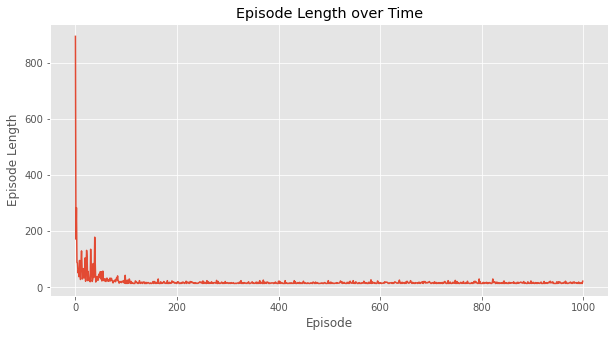

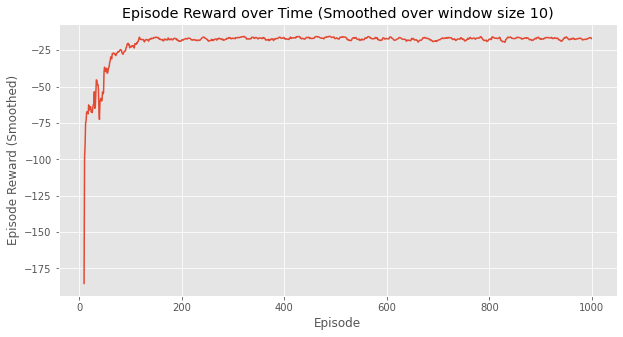

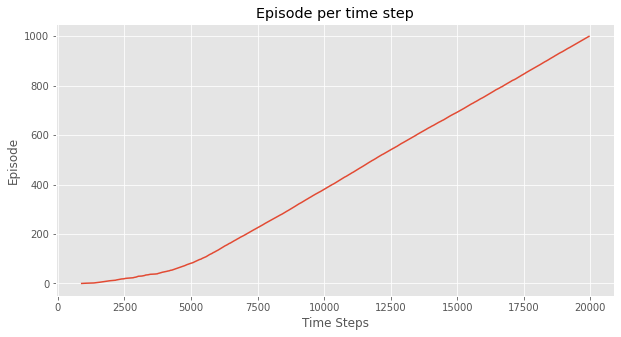

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats)

Python Implementation using Q-learning

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx

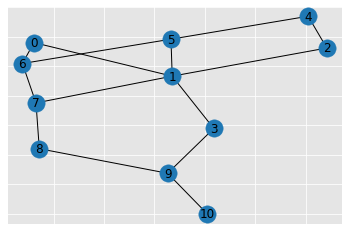

In [ ]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]
  
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [ ]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
	print(point)
	if point[1] == goal:
		M[point] = 100
	else:
		M[point] = 0

	if point[0] == goal:
		M[point[::-1]] = 100
	else:
		M[point[::-1]]= 0
		# reverse of point

M[goal, goal]= 100
print(M)
# add goal point round trip

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
# learning parameter
initial_state = 1

In [ ]:
# Determines the available actions for a given state
def available_actions(state):
	current_state_row = M[state, ]
	available_action = np.where(current_state_row >= 0)[1]
	return available_action

available_action = available_actions(initial_state)

In [ ]:
# Chooses one of the available actions at random
def sample_next_action(available_actions_range):
	next_action = int(np.random.choice(available_action, 1))
	return next_action


action = sample_next_action(available_action)

In [ ]:
def update(current_state, action, gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
  # Updates the Q-Matrix according to the path chosen

  update(initial_state, action, gamma)


In [ ]:
scores = []
for i in range(1000):
	current_state = np.random.randint(0, int(Q.shape[0]))
	available_action = available_actions(current_state)
	action = sample_next_action(available_action)
	score = update(current_state, action, gamma)
	scores.append(score)

Most efficient path:
[0, 1, 3, 9, 10]


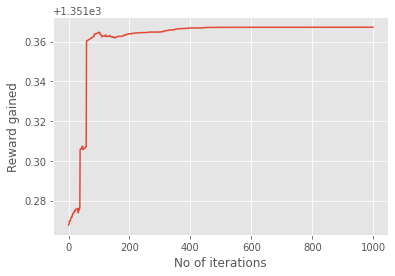

In [ ]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 10:

	next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
	if next_step_index.shape[0] > 1:
		next_step_index = int(np.random.choice(next_step_index, size = 1))
	else:
		next_step_index = int(next_step_index)
	steps.append(next_step_index)
	current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()


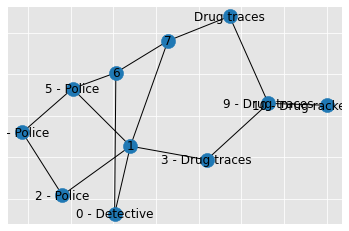

In [ ]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
		4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
		9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size =[200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1
  
# Same as above
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action
  
# Same as above
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
  
# Exploring the environment
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)
  
   
available_action = available_actions(initial_state)
action = sample_next_action(available_action)
  
def update(current_state, action, gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  environment = collect_environmental_data(action)
  if 'p' in environment:
    env_police[current_state, action] += 1
  if 'd' in environment:
    env_drugs[current_state, action] += 1
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
# Same as above
update(initial_state, action, gamma)
  
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
  
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = env_matrix_snap[state, av_action]
  
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_action = av_action[np.array(env_pos_row)[0]>= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action

In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
  
# print environmental matrices
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 15.  0.  0. 25.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 50.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 40.  0.  0. 37.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 30.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 31.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 41.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 29.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 52.  0.]
 [ 0.  0.  0. 29.  0.  0.  

Q-Learning Example : Self – Driving Cab

In [ ]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
state = env.encode(3,1,2,0)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

SARSA

In [ ]:
import numpy as np
import gym

In [ ]:
#Building the environment
env = gym.make('FrozenLake-v0')

In [ ]:
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))


In [ ]:
#Function to choose the next action
def choose_action(state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + alpha * (target - predict)


In [ ]:
#Initializing the reward
reward=0

# Starting the SARSA learning
for episode in range(total_episodes):
	t = 0
	state1 = env.reset()
	action1 = choose_action(state1)

	while t < max_steps:
		#Visualizing the training
		env.render()
		
		#Getting the next state
		state2, reward, done, info = env.step(action1)

		#Choosing the next action
		action2 = choose_action(state2)
		
		#Learning the Q-value
		update(state1, state2, reward, action1, action2)

		state1 = state2
		action1 = action2
		
		#Updating the respective vaLues
		t += 1
		reward += 1
		
		#If at the end of learning process
		if done:
			break


Streaming output truncated to the last 5000 lines.
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
 

In [ ]:
#Evaluating the performance
print ("Performace : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)


Performace :  0.0001
[[9.83159036e-04 1.05302109e-04 1.74254792e-02 4.38931901e-05]
 [3.23727941e-05 3.11243672e-04 6.10658068e-06 7.92523552e-04]
 [1.70624076e-03 5.93952953e-03 4.97551519e-04 4.06336241e-04]
 [1.03001680e-04 2.08521016e-05 3.44876735e-04 1.74185233e-04]
 [5.18178621e-03 4.14333371e-02 4.05098838e-04 9.32740631e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.54880116e-04 1.62734422e-05 6.53166619e-01 5.15898591e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.92620492e-05 6.54077966e-02 3.16131845e-02 1.05763511e-01]
 [1.96043561e-02 6.69306703e-01 1.86671920e-01 3.17135768e-02]
 [1.34041553e-01 4.16585239e-01 1.21126623e-01 8.12647930e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.55848770e-01 2.77772573e-02 1.21122155e-01 3.87460934e-02]
 [5.13902787e-01 3.68684654e-01 1.74354323e-01 6.30688326e-01]
 [0.00000000e+00 0.00000000e+00 0.